In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data_path = "."
train_model = pd.read_csv(data_path+"/train_model.csv")


**Is the relationship significant?**

*Correlation is any of a broad class of statistical relationships involving dependence*

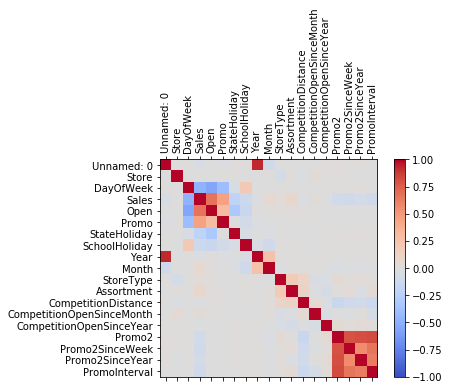

In [4]:
import matplotlib.pyplot as plt

corr = train_model.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(train_model.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(train_model.columns)
ax.set_yticklabels(train_model.columns)
plt.show()

In [5]:
print(corr["Sales"].sort_values(ascending=False))

Sales                        1.000000
Open                         0.669017
Promo                        0.457941
Assortment                   0.090303
Month                        0.055052
StoreType                    0.037322
CompetitionOpenSinceMonth    0.024011
Store                        0.005271
CompetitionOpenSinceYear    -0.010273
CompetitionDistance         -0.019023
Year                        -0.023087
Unnamed: 0                  -0.043914
Promo2SinceYear             -0.066596
Promo2                      -0.092353
PromoInterval               -0.094013
Promo2SinceWeek             -0.097373
SchoolHoliday               -0.121029
StateHoliday                -0.207833
DayOfWeek                   -0.474969
Name: Sales, dtype: float64


*Open is highly positively correlated with Sales with 0.669017 i.e, 67% correlation.*

 *Promo has 45% positive correlation.* 

*Month has 5% correlation.* 

*DayOfWeek has 47% negative correlation and it is the highly negatively correalted attribute with Sales.*

**Are any model assumptions violated?**

1. Linear Regression - There is relationship between independent and dependent variables

2. No or little multicollinearity - Promo has Variance Inflation Factor greater than 5. Therefore, it might has colinearity with any of the attributes. So it can be dropped.

3. No auto-correlation - There is no auto-correlation

4. Multivariate normality - There is multivariate normality



**AIC & BIC**

The Akaike’s information criterion – AIC and the Bayesian information criterion – BIC are measures of the goodness of fit of an estimated statistical model and can also be used for model selection. Both criteria depend on the maximized value of the likelihood function L for the estimated model.

k= # of variables

n = number of observations

AIC= 2k - 2ln(sse)

BIC = n*ln(sse/n) + k*ln(n)

In [6]:
def calAIC(y,y_hat,k):
  resid = y - y_hat
  sse = sum(resid**2)
  AIC= 2*k - 2*np.log(sse)
  return AIC
  
def calBIC(y,y_hat,k):
  n = len(y)
  resid = y - y_hat
  sse = sum(resid**2)
  BIC = n*np.log(sse/n) + k*np.log(n)
  return BIC

# Building Linear Models

In [7]:
from sklearn.model_selection import train_test_split
#Creating the features 

features = train_model.drop('Sales', axis=1)
target = train_model['Sales']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(704493, 18)
(301926, 18)
(704493,)
(301926,)


# Multi Linear Model with scaling

In [9]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score


#Setting up the scaling pipeline 

pipeline_order = [('scaler', StandardScaler()), ('linear_reg', linear_model.LinearRegression())]

Model_Pipeline = Pipeline(pipeline_order)

# evaluate pipeline
kfold = KFold(n_splits=3, random_state=7)
results = cross_val_score(Model_Pipeline, X_train, y_train, cv=kfold,scoring= 'r2')
Model_Pipeline.fit(X_train, y_train)
preds_train = Model_Pipeline.predict(X_train)
preds = Model_Pipeline.predict(X_test)
print("Train R^2:",round(results.mean(),3), round(results.std(),3))
print("Train AIC, BIC :",round(calAIC(y_train,preds_train,len(X_train.columns)),3),",", round(calBIC(y_train,preds_train,len(X_train.columns))))
print("-----------------------------------------------")
print("Test R^2:",round(r2_score(y_test, preds),3))
print("Test AIC, BIC :",round(calAIC(y_test,preds,len(X_test.columns)),3),",", round(calBIC(y_test,preds,len(X_test.columns))))

Train R^2: 0.549 0.0
Train AIC, BIC : -22.334 , 11062009.0
-----------------------------------------------
Test R^2: 0.548
Test AIC, BIC : -20.639 , 4740873.0


# Multi Linear model without scaling

In [10]:
from sklearn import linear_model
#Initializing a linear regression model 

linear_reg = linear_model.LinearRegression()

#Fitting the model on the data

model_wos = linear_reg.fit(X_train, y_train)

#Accuracy of the model
preds = model_wos.predict(X_test)
print("Test R^2:",round(r2_score(y_test, preds),3))
print("Test AIC, BIC :",round(calAIC(y_test,preds,len(X_test.columns)),3),",", round(calBIC(y_test,preds,len(X_test.columns))))

Test R^2: 0.548
Test AIC, BIC : -20.639 , 4740873.0


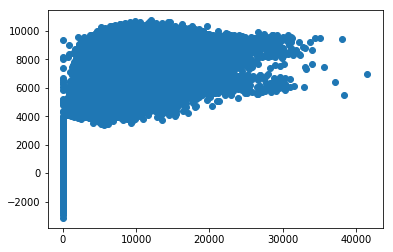

In [11]:
plt.scatter(y_test,linear_reg.predict(X_test))

# Cross validation with K-Fold

**Linear Model using SGD**

*Stochastic Gradient Descent (SGD), a simple modification to the standard gradient descent algorithm that computes the gradient and updates our weight matrix W on small batches of training data, rather than the entire training set itself.*


In [12]:
pipeline_order_sgd = [('scaler', StandardScaler()), ('linear_reg', linear_model.SGDRegressor())]

Model_Pipeline_sgd = Pipeline(pipeline_order_sgd)

# evaluate pipeline
kfold = KFold(n_splits=3, random_state=7)
results = cross_val_score(Model_Pipeline_sgd, X_train, y_train, cv=kfold,scoring= 'r2')
Model_Pipeline_sgd.fit(X_train, y_train)
preds_train = Model_Pipeline_sgd.predict(X_train)
preds = Model_Pipeline_sgd.predict(X_test)
print("Train R^2:",round(results.mean(),3), round(results.std(),3))
print("Train AIC, BIC :",round(calAIC(y_train,preds_train,len(X_train.columns)),3),",", round(calBIC(y_train,preds_train,len(X_train.columns))))
print("-----------------------------------------------")
print("Test R^2:",round(r2_score(y_test, preds),3))
print("Test AIC, BIC :",round(calAIC(y_test,preds,len(X_test.columns)),3),",", round(calBIC(y_test,preds,len(X_test.columns))))


Train R^2: 0.548 0.0
Train AIC, BIC : -22.344 , 11065399.0
-----------------------------------------------
Test R^2: 0.546
Test AIC, BIC : -20.648 , 4742251.0


*The values of train R^2, test R^2, AIC and BIC in Cross-validation are also same as multi linear models both with and without scaling*

**Does the model make sense?  Interpret the meaning of each independent variable.**

Id - an Id that represents a (Store, Date) duple within the test set

Store - a unique Id for each store

Sales - the turnover for any given day (this is what you are predicting)

Customers - the number of customers on a given day

Open - an indicator for whether the store was open: 0 = closed, 1 = open

StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

StoreType - differentiates between 4 different store models: a, b, c, d

Assortment - describes an assortment level: a = basic, b = extra, c = extended

CompetitionDistance - distance in meters to the nearest competitor store

CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

Promo - indicates whether a store is running a promo on that day

Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2

PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store


## Random Forest


In [14]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)*100
print("R^2:",rf.score(X_test, y_test))
preds = rf.predict(X_test)
print("AIC:",round(calAIC(y_test,preds,len(X_test.columns)),3))
print("BIC",round(calBIC(y_test,preds,len(X_test.columns)),3))

R^2: 0.9361605012890987
AIC: -16.725
BIC 4150120.591


**The accuracy has increased to 93.6% using random forest algorithm**